# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

## Data splitting

### Loading a dataset for classification

For this demonstration we will use the breast-cancer data set from sklearn datasets.
This dataset contains information about the characteristics of the tumor.

The objective is to predict if the tumor is benign or malignant.

In [2]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
print(X.shape)
print(y.shape)
#X, y = load_iris(return_X_y=True)
#print(X.shape)
#print(y.shape)
np.unique(y)

(569, 30)
(569,)


array([0, 1])

y = pd.Series(y)

<b> getting value counts on numpy array

In [3]:
np.unique(y, return_counts=True)
#y = y.apply(lambda x : 1 if x==0 else 0)

(array([0, 1]), array([212, 357], dtype=int64))

# Logistic regresion

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

#trans = PowerTransformer()

#trans.fit(X_train)

#X_train_mod = trans.transform(X_train)
#X_test_mod  = trans.transform(X_test)

log_model.fit(X_train, y_train) # X_train_mod

y_pred_train_log = log_model.predict(X_train)#(X_train_mod)
y_pred_test_log = log_model.predict(X_test)#(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)


E:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Error_metric,Train,Test
0,Accuracy,0.949451,0.938596
1,Precision,0.954225,0.936709
2,Recall,0.964413,0.973684


Confusion matrix for the train set
[[161  13]
 [ 10 271]]


Confusion matrix for the test set
[[33  5]
 [ 2 74]]


E:\Programs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
E:\Programs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


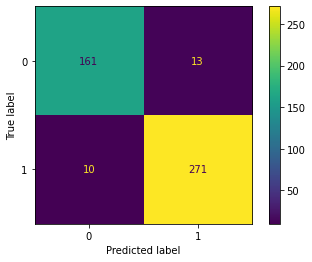

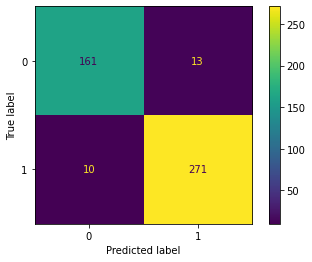

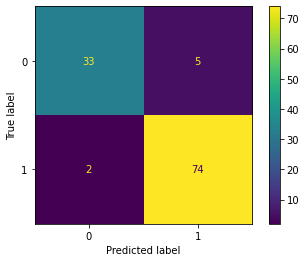

In [8]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train,y_train, values_format = 'd') # X_train_mod

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test,y_test, values_format = 'd') # X_train_mod


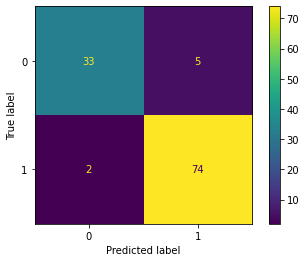

In [9]:
cm_test = confusion_matrix(y_test, y_pred_test_log, labels = log_model.classes_)
test = ConfusionMatrixDisplay(cm_test)
test.plot()